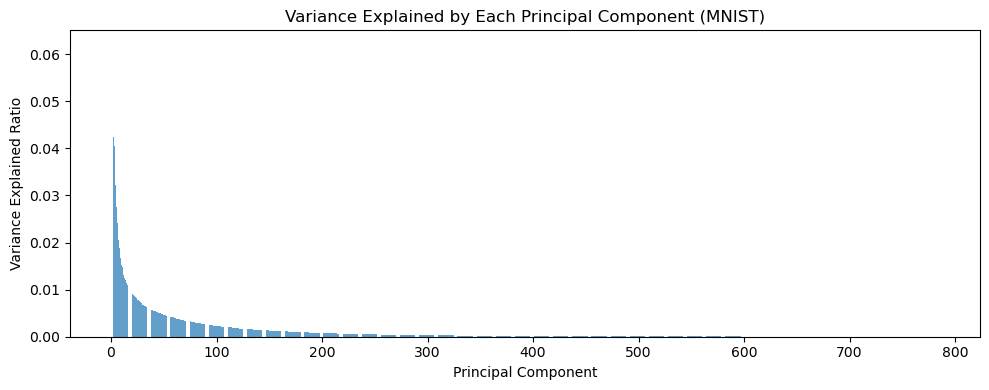

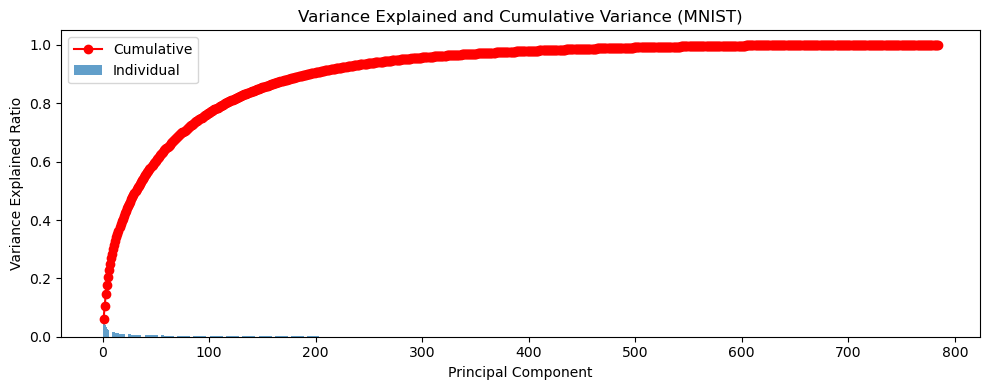

In [5]:
# 1. PCA on mnist_test_nolabels.csv: Bar-plot of explained variances and cumulative variance curve (robust NaN handling)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST test data (no labels)
mnist = pd.read_csv('../data/mnist_test_nolabels.csv')

# Fill NaN values with column mean (robust)
mnist_filled = mnist.apply(lambda col: col.fillna(col.mean()), axis=0)

# Standardize the data (mean=0, std=1)
X_std = (mnist_filled - mnist_filled.mean()) / mnist_filled.std()

# Double-check for any remaining NaNs and fill with 0 (if any)
X_std = X_std.fillna(0)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# Bar plot: variance explained by each PC
plt.figure(figsize=(10,4))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Each Principal Component (MNIST)')
plt.tight_layout()
plt.show()

# Bar plot + cumulative curve
plt.figure(figsize=(10,4))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label='Individual')
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', color='red', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained and Cumulative Variance (MNIST)')
plt.legend()
plt.tight_layout()
plt.show()

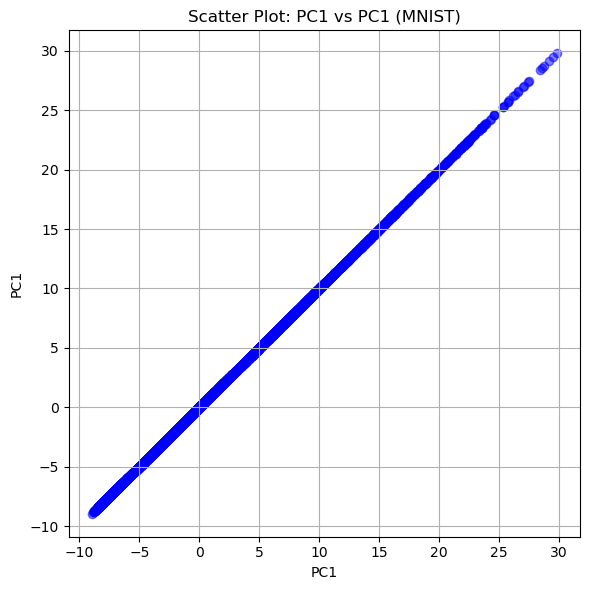

In [6]:
# Scatter plot: PC1 vs PC1 (should be a straight line)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,0], alpha=0.5, color='blue')
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.title('Scatter Plot: PC1 vs PC1 (MNIST)')
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\pravi\AppData\Local\Temp\ipykernel_18676\2271274524.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, s=10, cmap='viridis')
C:\Users\pravi\AppData\Local\Temp\ipykernel_18676\2271274524.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, s=10, cmap='viridis')


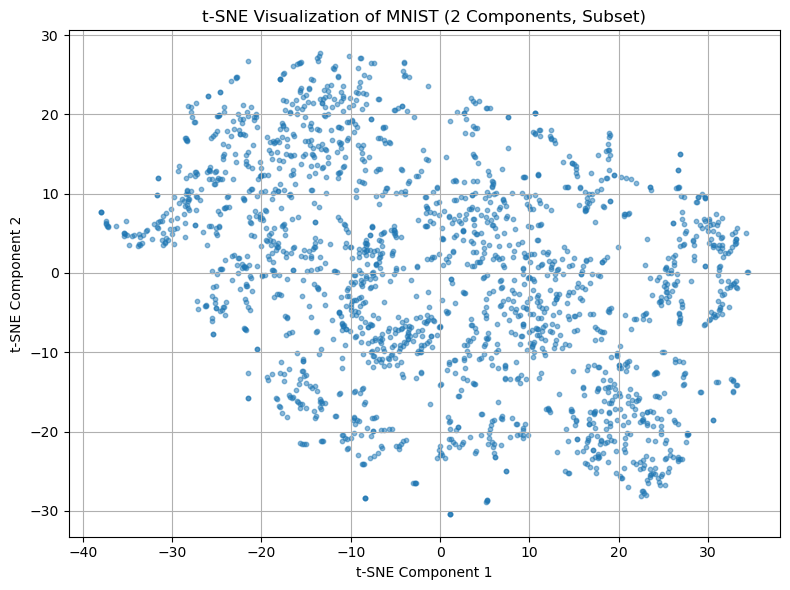

In [8]:
# t-SNE visualization: Reduce to 2 components and plot (FASTER: use a random subset of 2000 samples)
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Use a random subset for faster t-SNE
subset_size = 2000
if X_std.shape[0] > subset_size:
    np.random.seed(42)
    idx = np.random.choice(X_std.shape[0], subset_size, replace=False)
    X_for_tsne = X_std.iloc[idx].values if hasattr(X_std, 'iloc') else X_std[idx]
else:
    X_for_tsne = X_std.values if hasattr(X_std, 'values') else X_std

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_for_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, s=10, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of MNIST (2 Components, Subset)')
plt.grid(True)
plt.tight_layout()
plt.show()